### NATHAN BUTLER | 1001805566

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('vehicles_1.csv')
data.head(5)
data.describe

<bound method NDFrame.describe of      weight   mpg
0     2.639  28.0
1     3.517  25.0
2     3.470  26.0
3     3.850  22.0
4     2.998  27.0
..      ...   ...
152     NaN  25.0
153   3.208  25.0
154   3.259  25.0
155   3.601  23.0
156   3.600  24.0

[157 rows x 2 columns]>

## Descriptive Statistics

In [22]:
data.describe()

,weight,mpg
count,143.000000,143.000000
mean,3.368420,23.909091
std,0.622678,4.247467
min,1.895000,15.000000
25%,2.962500,21.000000
50%,3.332000,24.000000
75%,3.822000,26.000000
max,5.572000,45.000000


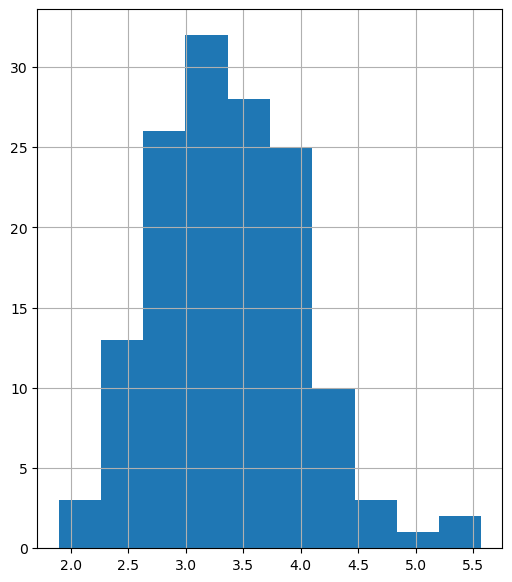

In [23]:
plt.figure(figsize=(6,7))
data['weight'].hist()
plt.show()

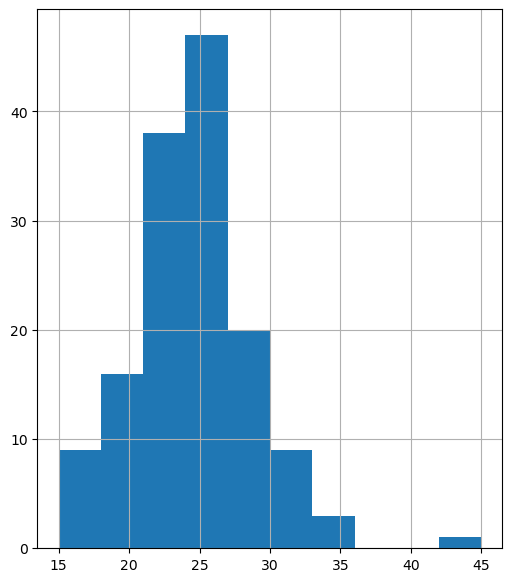

In [24]:
plt.figure(figsize=(6,7))
data['mpg'].hist()
plt.show()

In [25]:
## Note, the `weight` column is normally distributed, while the `mpg` column is right-skewed.

## Data Preprocessing

In [33]:
data.count()
#data_temp_drop.count()

weight    145
mpg       154
dtype: int64

## Standardizing the values in our dataset

In [47]:
# Here, we use mean imputation before standardizing our values.
data_temp_drop = data.dropna().copy()

# First, we find the mean of the temp drop data (for each column), then return that mean number
def find_mean(data_temp_drop):
    return data_temp_drop['mpg'].mean(), data_temp_drop['weight'].mean()

# Second, we replace all missing values with what is returned by First.
def mean_impute(data_original, mean):
    for col in data.columns:
        if col == 'mpg':
            data[col] = data[col].fillna(mean[0]).reset_index(drop=True)
        else:
            data[col] = data[col].fillna(mean[1]).reset_index(drop=True)
        print("Filled missing values with means.")
    return data
mean = find_mean(data_temp_drop)
data_imputed = mean_impute(data, mean)
data_imputed

Filled missing values with means.
Filled missing values with means.


,weight,mpg
0,2.63900,28.0
1,3.51700,25.0
2,3.47000,26.0
3,3.85000,22.0
4,2.99800,27.0
...,...,...
152,3.36842,25.0
153,3.20800,25.0
154,3.25900,25.0
155,3.60100,23.0


In [49]:
# Standardizing the values in the dataset.
def numerical_zscore(data, column_list):
    return {col: (data[col] - data[col].mean()) / data[col].std(ddof=0) for col in column_list}
column_list = ['weight', 'mpg']
data_standardized = numerical_zscore(data_imputed, column_list)
data_standardized

{'weight': 0     -1.233727
 1      0.248625
 2      0.169273
 3      0.810838
 4     -0.627617
          ...   
 152   -0.002228
 153   -0.273069
 154   -0.186964
 155    0.390444
 156    0.388756
 Name: weight, Length: 157, dtype: float64,
 'mpg': 0      0.982685
 1      0.273098
 2      0.509627
 3     -0.436490
 4      0.746156
          ...   
 152    0.273098
 153    0.273098
 154    0.273098
 155   -0.199961
 156    0.036568
 Name: mpg, Length: 157, dtype: float64}

## Creating a simple linear regression model

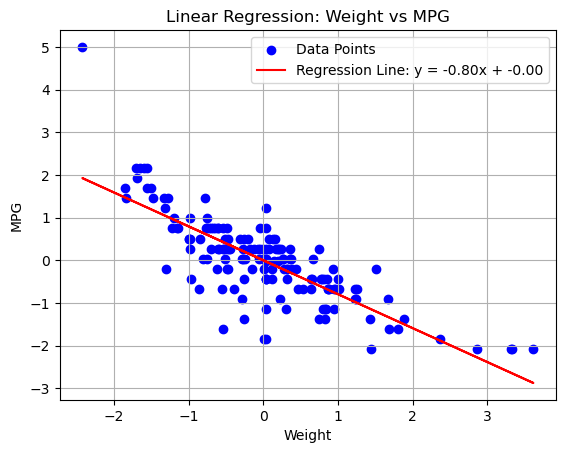

In [77]:
x=data_standardized['weight']
y=data_standardized['mpg']
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Linear Regression: Weight vs MPG')
plt.legend()
plt.grid(True)
plt.show()

# Part 2: Multiple Linear Regresssion 

In [79]:
data_2 = pd.read_csv('vehicles_2.csv')
data_2.head(5)
#data_2.describe

,sales,type,price,engine,horsepow,wheelbas,width,length,weight,fuelcap,mpg
0,16.919,Automobile,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,39.384,Automobile,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,14.114,Automobile,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,8.588,Automobile,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,20.397,Automobile,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


## Descriptive Statistics

In [80]:
#data_2.describe()
data_2

,sales,type,price,engine,horsepow,wheelbas,width,length,weight,fuelcap,mpg
0,16.919,Automobile,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,39.384,Automobile,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,14.114,Automobile,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,8.588,Automobile,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,20.397,Automobile,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,Automobile,24.40,1.9,160.0,NaN,67.6,176.6,3.042,15.8,25.0
153,15.245,Automobile,27.50,2.4,168.0,104.9,NaN,185.9,3.208,17.9,25.0
154,17.531,Automobile,28.80,2.4,168.0,104.9,69.3,NaN,3.259,17.9,25.0
155,3.493,Automobile,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0


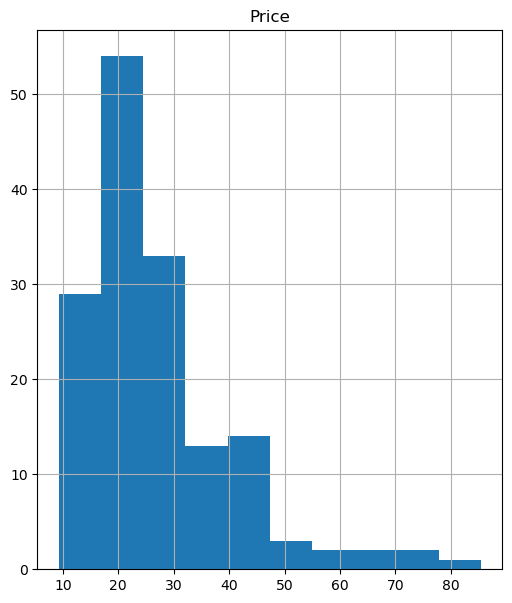

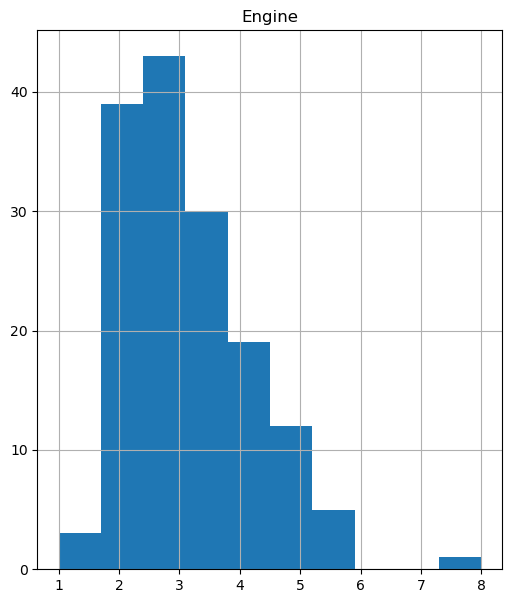

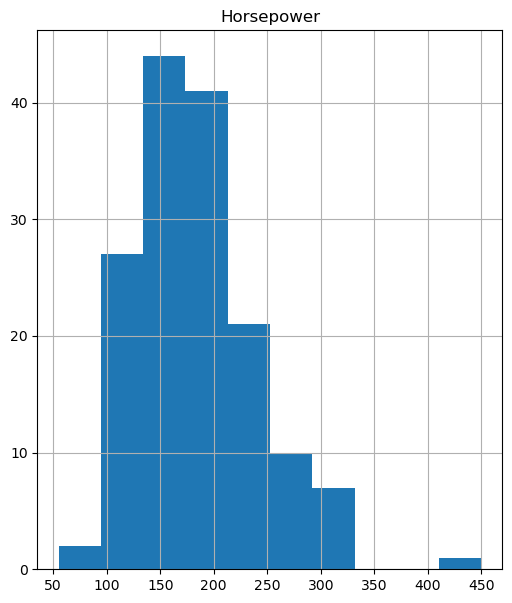

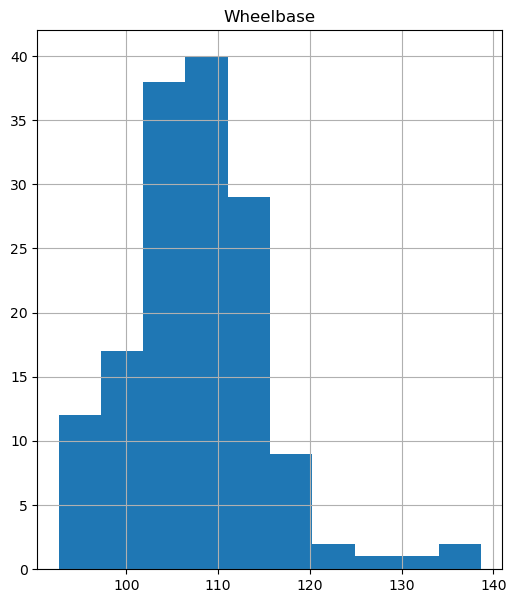

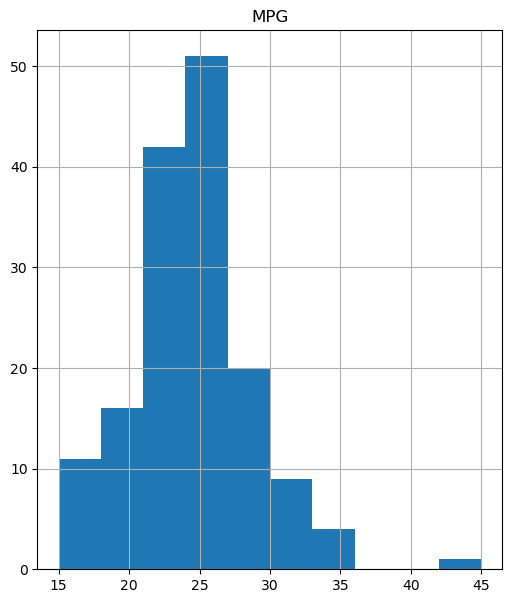

In [81]:
plt.figure(figsize=(6,7))
data_2['price'].hist()
plt.title("Price")
plt.show()

plt.figure(figsize=(6,7))
data_2['engine'].hist()
plt.title("Engine")
plt.show()

plt.figure(figsize=(6,7))
data_2['horsepow'].hist()
plt.title("Horsepower")
plt.show()

plt.figure(figsize=(6,7))
data_2['wheelbas'].hist()
plt.title("Wheelbase")
plt.show()

plt.figure(figsize=(6,7))
data_2['mpg'].hist()
plt.title("MPG")
plt.show()

## Data Preprocessing

In [82]:
#data_2.count()
#data_2_temp_drop.count()
data_2.columns

Index(['sales', 'type', 'price', 'engine', 'horsepow', 'wheelbas', 'width',
       'length', 'weight', 'fuelcap', 'mpg'],
      dtype='object')

In [83]:
# Here, we use mean imputation before standardizing our values.
data_2_temp_drop = data_2.dropna().copy()

# First, we find the mean of the temp drop data (for each column), then return that mean number
def find_mean(data_2_temp_drop):
    return (data_2_temp_drop['sales'].mean(),
            data_2_temp_drop['price'].mean(),
            data_2_temp_drop['engine'].mean(),
            data_2_temp_drop['horsepow'].mean(),
            data_2_temp_drop['wheelbas'].mean(),
            data_2_temp_drop['width'].mean(),
            data_2_temp_drop['length'].mean(),
            data_2_temp_drop['weight'].mean(),
            data_2_temp_drop['fuelcap'].mean(),
            data_2_temp_drop['mpg'].mean()
           )

# Second, we replace all missing values with what is returned by First.
def mean_impute(data, mean):
    for col in data.columns:
        if col == 'sales':
            data[col] = data[col].fillna(mean[0]).reset_index(drop=True)
        elif col == 'price':
            data[col] = data[col].fillna(mean[1]).reset_index(drop=True)
        elif col == 'engine':
            data[col] = data[col].fillna(mean[2]).reset_index(drop=True)
        elif col == 'horsepow':
            data[col] = data[col].fillna(mean[3]).reset_index(drop=True)
        elif col == 'wheelbas':
            data[col] = data[col].fillna(mean[4]).reset_index(drop=True)
        elif col == 'width':
            data[col] = data[col].fillna(mean[5]).reset_index(drop=True)
        elif col == 'length':
            data[col] = data[col].fillna(mean[6]).reset_index(drop=True)
        elif col == 'weight':
            data[col] = data[col].fillna(mean[7]).reset_index(drop=True)
        elif col == 'fuelcap':
            data[col] = data[col].fillna(mean[8]).reset_index(drop=True)
        elif col == 'mpg':
            data[col] = data[col].fillna(mean[9]).reset_index(drop=True)



        print("Filled missing values with means.")
    return data
mean = find_mean(data_2_temp_drop)
data_2_imputed = mean_impute(data_2, mean)
data_2_imputed 

Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.
Filled missing values with means.


,sales,type,price,engine,horsepow,wheelbas,width,length,weight,fuelcap,mpg
0,16.919,Automobile,21.500000,1.8,140.0,101.200000,67.300000,172.400000,2.639,13.2,28.0
1,39.384,Automobile,28.400000,3.2,225.0,108.100000,70.300000,192.900000,3.517,17.2,25.0
2,14.114,Automobile,27.594606,3.2,225.0,106.900000,70.600000,192.000000,3.470,17.2,26.0
3,8.588,Automobile,42.000000,3.5,210.0,114.600000,71.400000,196.600000,3.850,18.0,22.0
4,20.397,Automobile,23.990000,1.8,150.0,102.600000,68.200000,178.000000,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,Automobile,24.400000,1.9,160.0,107.674016,67.600000,176.600000,3.042,15.8,25.0
153,15.245,Automobile,27.500000,2.4,168.0,104.900000,71.183465,185.900000,3.208,17.9,25.0
154,17.531,Automobile,28.800000,2.4,168.0,104.900000,69.300000,187.550394,3.259,17.9,25.0
155,3.493,Automobile,45.500000,2.3,236.0,104.900000,71.500000,185.700000,3.601,18.5,23.0


In [75]:
# Standardizing the values in the dataset.
def numerical_zscore(data, column_list):
    return {col: (data[col] - data[col].mean()) / data[col].std(ddof=0) for col in column_list}
column_list = ['sales', 'price', 'engine', 'horsepow', 'wheelbas', 'width',
       'length', 'weight', 'fuelcap', 'mpg']
data_2_standardized = numerical_zscore(data_2_imputed, column_list)
data_2_standardized

{'sales': 0     -0.532042
 1     -0.200761
 2     -0.573406
 3     -0.654896
 4     -0.480754
          ...   
 152   -0.729263
 153   -0.556728
 154   -0.523017
 155   -0.730030
 156   -0.501812
 Name: sales, Length: 157, dtype: float64,
 'price': 0     -0.416332
 1      0.095420
 2      0.035687
 3      1.104092
 4     -0.231656
          ...   
 152   -0.201248
 153    0.028670
 154    0.125087
 155    1.363677
 156    0.659090
 Name: price, Length: 157, dtype: float64,
 'engine': 0     -1.224696
 1      0.140716
 2      0.140716
 3      0.433304
 4     -1.224696
          ...   
 152   -1.127167
 153   -0.639520
 154   -0.639520
 155   -0.737049
 156   -0.151873
 Name: engine, Length: 157, dtype: float64,
 'horsepow': 0     -0.816945
 1      0.734315
 2      0.734315
 3      0.460563
 4     -0.634444
          ...   
 152   -0.451943
 153   -0.305942
 154   -0.305942
 155    0.935066
 156    0.296312
 Name: horsepow, Length: 157, dtype: float64,
 'wheelbas': 0     -0.860473
 1     

## Multiple Linear Regression

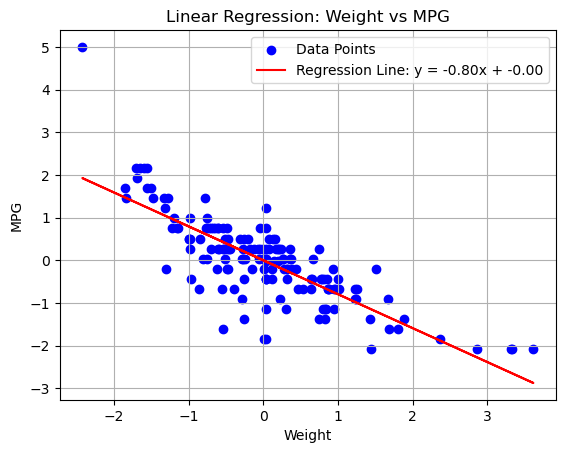

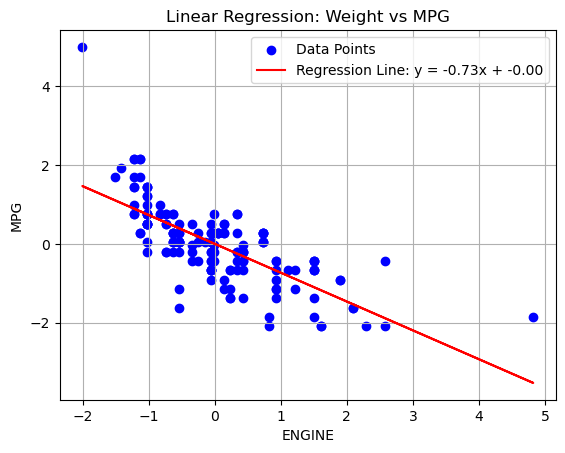

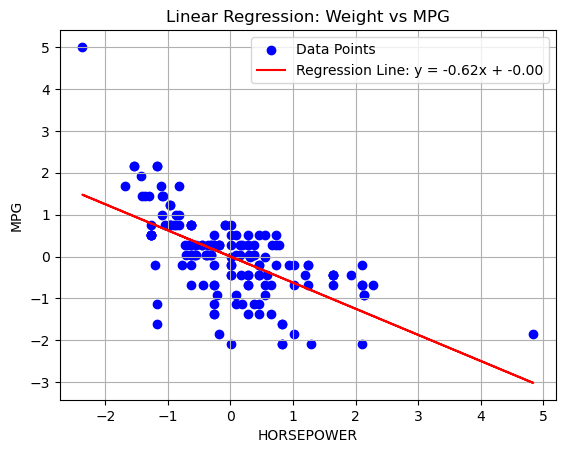

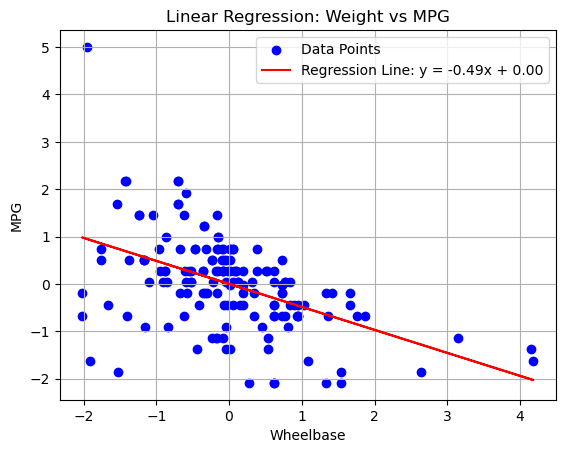

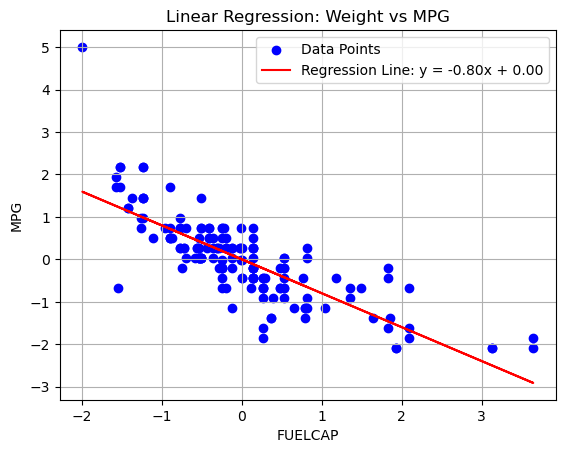

In [76]:
## Creating a simple linear regression model
x=data_2_standardized['weight']
y=data_2_standardized['mpg']
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Linear Regression: Weight vs MPG')
plt.legend()
plt.grid(True)
plt.show()


# Engine
x=data_2_standardized['engine']
y=data_2_standardized['mpg']
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('ENGINE')
plt.ylabel('MPG')
plt.title('Linear Regression: Weight vs MPG')
plt.legend()
plt.grid(True)
plt.show()

# Horsepower
x=data_2_standardized['horsepow']
y=data_2_standardized['mpg']
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('HORSEPOWER')
plt.ylabel('MPG')
plt.title('Linear Regression: Weight vs MPG')
plt.legend()
plt.grid(True)
plt.show()

# Wheelbase
x=data_2_standardized['wheelbas']
y=data_2_standardized['mpg']
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('Wheelbase')
plt.ylabel('MPG')
plt.title('Linear Regression: Weight vs MPG')
plt.legend()
plt.grid(True)
plt.show()

# Fuelcap
x=data_2_standardized['fuelcap']
y=data_2_standardized['mpg']
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('FUELCAP')
plt.ylabel('MPG')
plt.title('Linear Regression: Weight vs MPG')
plt.legend()
plt.grid(True)
plt.show()